In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train_df = pd.read_csv("E:/IIITH AIML/week12/experiment3/Accident_train.csv")
test_df = pd.read_csv("E:/IIITH AIML/week12/experiment3/Accident_test.csv")
combine = [train_df, test_df]
target = 'Collision_Severity'
IDcol = 'Collision_Ref_No'

C:\Users\sravyay\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sravyay\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Collision_Severity'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    #if performCV:
     #   cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Collision_Severity'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Collision_Severity'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Collision_Severity'], dtrain_predprob))
    
    #if performCV:
     #   print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [10]:
#Choose all predictors except target & IDcols
predictors = [x for x in train_df.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train_df, predictors)


Model Report
Accuracy : 0.9091


ValueError: multiclass format is not supported

In [2]:
week_mapping = {"MON": 1, "TUE": 2, "WED": 3, "THU": 4, "FRI": 5, "SAT": 6, "SUN": 7}
for dataset in combine:
    dataset['Weekday_of_Collision'] = dataset['Weekday_of_Collision'].map(week_mapping)
    dataset['Weekday_of_Collision'] = dataset['Weekday_of_Collision'].fillna(0)

train_df.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,CREA,3,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,6,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,3,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,7,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [3]:
uniq_pas = train_df["Policing_Area"].unique()
pas_dict = {}
for i in range(0,len(uniq_pas)):
    pas_dict[uniq_pas[i]]=i
    
for dataset in combine:
    dataset['Policing_Area'] = dataset['Policing_Area'].map(pas_dict)
    dataset['Policing_Area'] = dataset['Policing_Area'].fillna(0)

train_df.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,0,3,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,1,3,6,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,2,3,3,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,1,3,7,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,3,3,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [4]:
for dataset in combine:
    dataset['Policing_Area'] = dataset['Policing_Area'].fillna(train_df.Policing_Area.dropna().mode()[0])
    dataset['Hour_of_Collision'] = dataset['Hour_of_Collision'].fillna(train_df.Hour_of_Collision.dropna().mode()[0])
    dataset['Junction_Detail'] = dataset['Junction_Detail'].fillna(train_df.Junction_Detail.dropna().mode()[0])
    dataset['Junction_Control'] = dataset['Junction_Control'].fillna(train_df.Junction_Control.dropna().mode()[0])
    dataset['Ped_Crossing_HC'] = dataset['Ped_Crossing_HC'].fillna(train_df.Ped_Crossing_HC.dropna().mode()[0])
    dataset['Ped_Crossing_PC'] = dataset['Ped_Crossing_PC'].fillna(train_df.Ped_Crossing_PC.dropna().mode()[0])
    dataset['Road_Surface_Conditions'] = dataset['Road_Surface_Conditions'].fillna(train_df.Road_Surface_Conditions.dropna().mode()[0])
    dataset['Special_Conditions_at_Site'] = dataset['Special_Conditions_at_Site'].fillna(train_df.Special_Conditions_at_Site.dropna().mode()[0])

In [5]:
X_train = train_df.drop(["Collision_Severity"], axis=1)
Y_train = train_df["Collision_Severity"]
X_test  = test_df.drop(["Collision_Severity"], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((10043, 16), (10043L,), (354, 16))

In [24]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,Y_train)
Y_pred = grid.predict(X_test)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
0.0548864037986
1.0


In [15]:
submission = pd.DataFrame({
        "Collision_Ref_No": 1,
        "Collision_Severity": Y_pred
    })
submission.to_csv('E:/IIITH AIML/week12/experiment3/new_submission.csv', index=False)

In [27]:
# Randomized Search for Algorithm Tuning
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train,Y_train)
Y_pred = rsearch.predict(X_test)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000FFFE710>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)
0.05488633712
0.9884363741


Automatically created module for IPython interactive environment


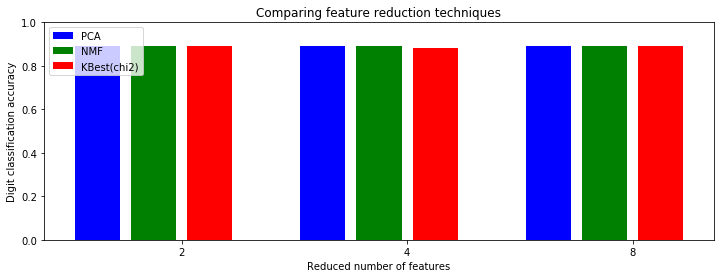

In [29]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
#digits = load_digits()
grid.fit(X_train,Y_train)
Y_pred = grid.predict(X_test)
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [7]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [8]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [14]:
folds = 8
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, Y_train)
Y_pred = random_search.predict(X_test)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  5.4min finished


In [12]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = GridSearchCV(xgb, param_grid=params,  n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, Y_train)
Y_pred = random_search.predict(X_test)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 24.4min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed: 43.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 105.3min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 151.5min
[Parallel(n_jobs=4)]: Done 2025 out of 2025 | elapsed: 208.6min finished


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
y_test = random_search.predict_proba(test)
results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

In [42]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(train_df['Collision_Severity'], shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'n_folds'